In [32]:
import scipy.io
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

{'__header__': b'MATLAB 5.0 MAT-file, Platform: SOL2, Created on: Sat Aug  5 21:16:28 2000', '__version__': '1.0', '__globals__': [], 'factory2': array([[3744],
       [3411],
       [3706],
       ...,
       [5354],
       [3806],
       [2066]], dtype=int16)}
(4699904, 1)


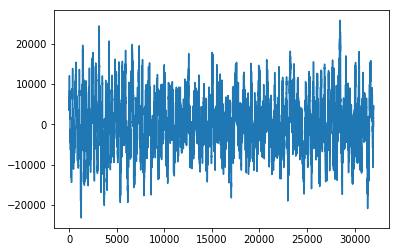

In [33]:
mat = scipy.io.loadmat('../noise_source/factory2.mat')
print(mat)
sound = mat['factory2']
print(sound.shape)
plt.plot(sound[:32000])
plt.show()

In [34]:
part_sound = sound[:32000].reshape(1,32000)

In [35]:
Audio(part_sound, rate=16000)

In [87]:
def scale1(s):
    # normalize to (-1,1)
    normalized =s / np.max(np.abs(s))
    return normalized

In [67]:
part_sound = np.squeeze(part_sound)

In [68]:
part_sound

array([3744, 3411, 3706, ..., 4495, 3786, 3788], dtype=int16)

In [71]:
min_max_norm(part_sound)

array([0.14533033, 0.13240432, 0.14385529, ..., 0.17448179, 0.14696064,
       0.14703827])

In [72]:
Audio(min_max_norm(part_sound), rate=16000)

In [36]:
sound[:32000]

array([[3744],
       [3411],
       [3706],
       ...,
       [4495],
       [3786],
       [3788]], dtype=int16)

In [37]:
import librosa

In [38]:
wav, sr = librosa.load('../utils/speakerA.wav',sr=16000)

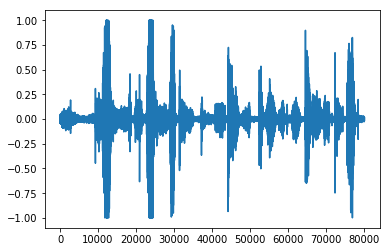

In [39]:
plt.plot(wav)

In [42]:
wav
stft_Result = librosa.stft(wav)
S = np.abs(stft_Result)

In [44]:
S, stft_Result

(array([[4.5836844e-02, 3.0552721e-02, 1.4976852e-02, ..., 1.4340348e-02,
         1.3186713e-02, 4.4219061e-03],
        [3.8625382e-02, 1.6706618e-02, 7.9593696e-03, ..., 7.3971711e-03,
         8.0417469e-03, 7.5192167e-03],
        [3.3042610e-02, 1.6300054e-02, 1.0771962e-03, ..., 1.7121882e-04,
         6.9652061e-04, 1.2207109e-02],
        ...,
        [1.7917956e-03, 1.1257271e-03, 2.9502466e-04, ..., 1.9838799e-04,
         2.8288115e-03, 1.6632322e-02],
        [1.7631016e-03, 8.6191745e-04, 5.8657079e-05, ..., 3.8623577e-04,
         2.9162089e-03, 1.6479110e-02],
        [1.5808821e-03, 7.2091643e-04, 6.9780319e-05, ..., 4.5101770e-04,
         2.6425335e-03, 1.6399024e-02]], dtype=float32),
 array([[ 4.5836844e-02+0.00000000e+00j,  3.0552721e-02+0.00000000e+00j,
          1.4976852e-02+0.00000000e+00j, ...,
          1.4340348e-02+0.00000000e+00j,  1.3186713e-02+0.00000000e+00j,
          4.4219061e-03+0.00000000e+00j],
        [-3.8625382e-02+2.16467740e-16j, -6.8489606e

In [18]:
Audio(wav*2000, rate=16000)

In [29]:
wav.shape

(80128,)

In [30]:
part_sound.shape

(1, 32000)

In [73]:
def Add_noise(x, d, SNR):
    P_signal = np.sum(abs(x)**2)
    P_d = np.sum(abs(d)**2)
    P_noise = P_signal/(10**(SNR/10))
    noise = np.sqrt(P_noise/P_d)*d
    added_noise = x + noise
    return added_noise

In [83]:
sq_noise = np.squeeze(sound[:len(wav)])

In [84]:
sq_noise.shape

(80128,)

In [88]:
nor_noise = scale1(sq_noise)

In [89]:
Audio(nor_noise, rate=16000)

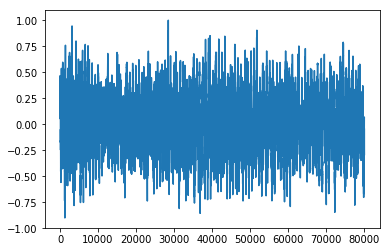

In [90]:
plt.plot(nor_noise)

In [94]:
added_10 = Add_noise(wav, nor_noise, 10)

In [95]:
Audio(added_10, rate=16000)

In [96]:
added_0 = Add_noise(wav, nor_noise, 0)
Audio(added_0, rate=16000)

In [97]:
added_20 = Add_noise(wav, nor_noise, 20)
Audio(added_20, rate=16000)

In [99]:
wav.shape

(80128,)

In [100]:
two = wav[:32000]

In [101]:
Audio(two, rate=16000)

In [110]:
four = np.hstack((two,np.zeros(32000)))

In [111]:
Audio(four, rate=16000)

In [112]:
four

array([-0.00167847,  0.02111816,  0.01257324, ...,  0.        ,
        0.        ,  0.        ])

In [113]:
def padsilenceafter(wav, samples):
    return np.hstack((wav, np.zeros(samples)))

def padsilencebefore(wav, samples):
    return np.hstack((np.zeros(samples), wav))

In [121]:
L = 48000

In [122]:
a1,_ = librosa.load('../utils/speakerA.wav',sr=16000)
a2,_ = librosa.load('../utils/speakerB.wav',sr=16000)

In [123]:
Audio(a1, rate = 16000)

In [124]:
Audio(a2, rate = 16000)

In [125]:
L/2

24000.0

In [126]:
a2_len = L - L/2

In [129]:
na1 = padsilenceafter(a1[:int(L / 2)], int(a2_len))

In [130]:
na2 = padsilencebefore(a2[:int(a2_len)], int(L/2))

In [131]:
Audio(na1, rate = 16000)

In [132]:
Audio(na2, rate = 16000)

In [133]:
Audio(na1+na2, rate = 16000)

In [134]:
import os

In [135]:
noise_type = 'fac'

In [139]:
dirs = os.path.join('.', 'noise', noise_type)

In [142]:
os.makedirs(dirs, exist_ok=True)

In [143]:
arr = list(range(10**2))